<h1 align="center">Ecuación de Poisson Boltzmann</h1>
<div align="right">Por David A. Miranda, PhD<br>Creado en 2021<br>Actualizado el 14 de abril de 2023</div>
<h2>1. Importa las librerias</h2>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.constants as cte
from scipy.integrate import odeint

## 2. Planteamiento del problema

Sea una solución electrolítica a temperatura absoluta $T$, formada por dos especies, una consistente en cationes con número de oxidación $z$ y la otra en aniones con número de oxidación $-z$, cada una con concentración $\eta_0$. Suponga que introduce un electrodo metálico en la solución el cual, cuando se alcanza el equilibrio termodinámico, tendrá un valor esperado del potencial eléctrico igual a $\phi_0$; para una descripción en una dimensión, obtenga la diferencia de potencial  $\phi(x)$ para las posiciones medidas desde el electrodo, es decir, $\phi(0) = \phi_0$.

## 3. Métodos y definiciones

In [2]:
q_e = cte.e                        # Carga del electrón
z   = 1                            # Valencia
eps = 80.5 * cte.epsilon_0         # Permitividad eléctrica del agua por la del vacío
dpi = 240

In [3]:
def poisson_boltzmann_1D(x, n0, phi_0, T):
    kT = cte.Boltzmann * (T + 273.15)
    gamma = np.tanh(z * q_e * phi_0 / (4*kT))
    kappa = np.sqrt(( 2 * (z**2) * n0 * (q_e**2) ) / (eps*kT)) 
    return 4*np.arctanh(gamma * np.exp(-kappa * x))

In [4]:
def plot_adimentional_potential(x, n0, phi_0, T, fig=1, dpi=dpi):
    psi_pb = poisson_boltzmann_1D(x, n0, phi_0, T)
    title = r'Figura %d. Potencial adimensional $\psi(x)$ para:%s$\phi_0 = %0.3f$ [V] y $\eta_0 = %0.2f$ [mol/L]' % (fig, '\n', phi_0, n0)
    plt.plot(x, psi_pb, label='T = %0.1f ºC' % T)
    plt.xlabel('x [m]')
    plt.ylabel(r'$\psi(x)$')
    plt.title(title)

In [5]:
def plot_electric_potential(x, n0, phi_0, T, fig=1, dpi=dpi):
    psi_pb = poisson_boltzmann_1D(x, n0, phi_0, T)
    kT = cte.Boltzmann * (T + 273.15) # Constante de Boltzmann por la temperatura
    title = r'Figura %d. Potencial eléctrico $\phi(x)$ para:%s$\phi_0 = %0.3f$ [V] y $\eta_0 = %0.2f$ [mol/L]' % (fig, '\n', phi_0, n0)
    plt.plot(x, kT*psi_pb/(z*q_e), label='T = %0.1f ºC' % T)
    plt.xlabel('x [m]')
    plt.ylabel(r'$\phi(x)$    [V]')
    plt.title(title)

In [6]:
def dXi_dx(U, x, kappa):
    # U es un arreglo tal que ѱ = U[0] y ξ = U[1]
    # Esta función retorna las primeras derivadas [ѱ', ξ']
    psi = U[0]
    xi  = U[1]
    dxi_dx  = kappa**2 * np.sinh(psi)
    dpsi_dx = xi
    return [ dpsi_dx, dxi_dx ]

## 4. Ecuación de Poisson-Boltzmann
La ecuación de Poisson se puede utilizar para estudiar las propiedades eléctricas de cargas eléctricas suspendidas en solución.  En tal caso, la densidad de cargas eléctricas en suspensión se puede modelar con una distribución de Maxwell-Botlzmann.  La ecuación de Poisson obtenida al considerar cargas positivas y negativas que obedecen una distribución de Maxwell-Boltzmn se conoce como ecución de Poisson-Boltzmann [(Grinmes and Martinsen, 2018, pp 30-33)](https://bibliotecavirtual.uis.edu.co:2191/science/article/pii/B9780123740045000027/pdfft):

$$\nabla^2\phi = \frac{2zq_e \eta_0}{\epsilon} sinh \left( \frac{zq_e}{k_BT} \phi \right)$$

En términos de la longitud de Debye $1/\kappa$ y se hace un cambio de variable $\psi = \dfrac{zq_e}{k_BT} \phi$, la ecuación de Poisson-Boltzmann toma la siguiente forma:

$$\nabla^2\psi = \kappa^2 sinh \left( \psi \right)\qquad(1)$$

Donde, $\kappa = \left( \dfrac{2z^2q_e^2 \eta_0}{\varepsilon k_BT} \right)^{1/2}$




### 4.1. Solución analítica para una dimensión, 1D
La solución analítica de la ecuación (1) para el caso unidimensional está dada por:

$$ \psi(x) = 4 tanh^{-1} \left( \gamma e^{-\kappa x} \right)$$

Donde $\gamma = tanh\left( \frac{zq_e\psi_0}{4k_BT} \right)$.

Ver más detalles en [(Ohshima 2013, pp. 345)](https://link.springer.com/referenceworkentry/10.1007/978-3-642-20665-8_15).

### 4.2. Gráfica del potecial adimensional $\psi(x)$ y el potencial eléctrcio $\phi(x)$

In [7]:
n0  = 0.1           # Concentración en mol/litro
phi_0 = 0.2         # Potencial en el electrodo, en V
T = 300             # Temperatura de la solución, en K

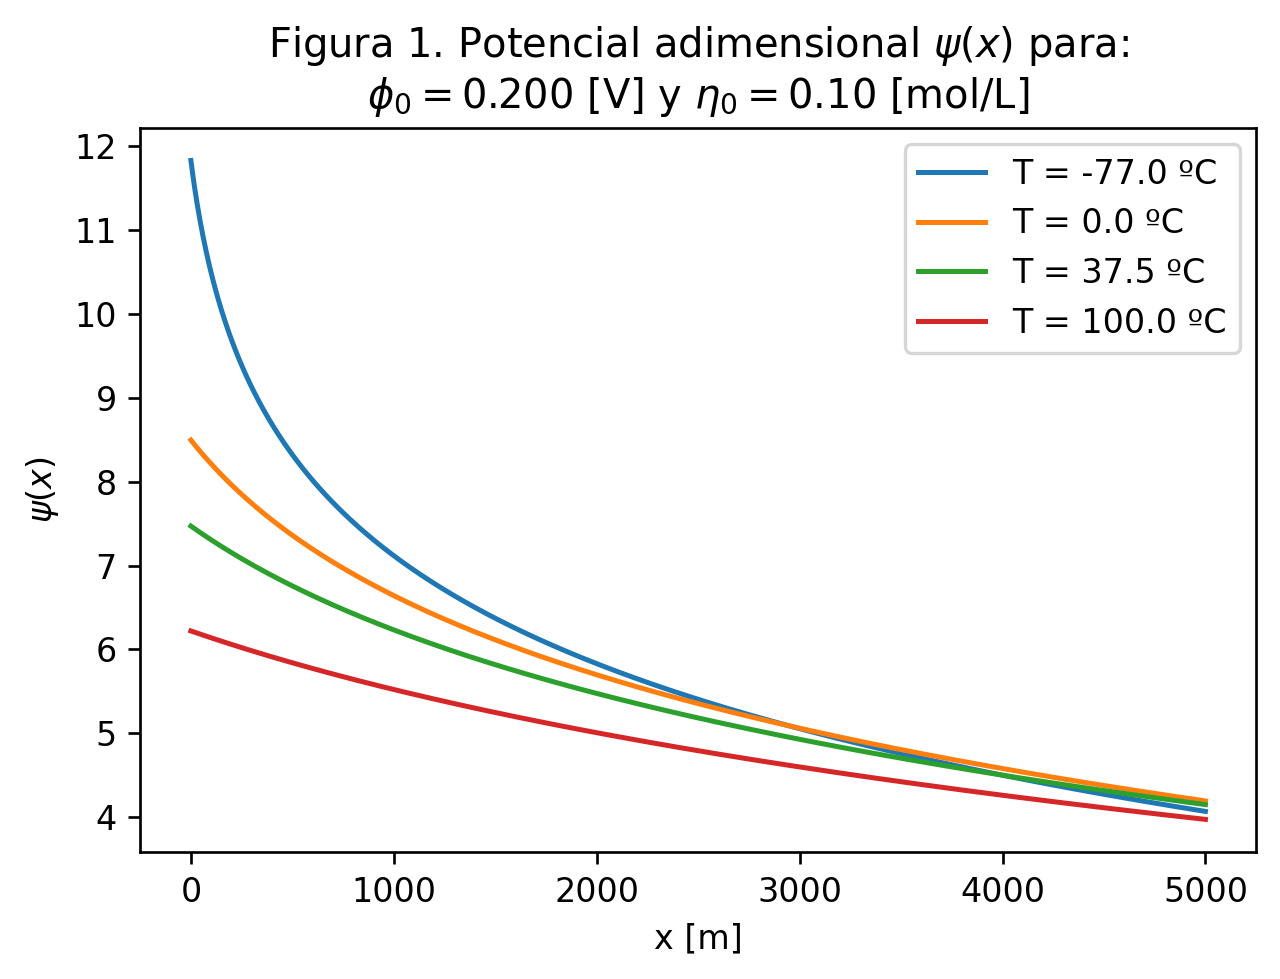

In [8]:
plt.figure(dpi=240)
x = np.linspace(1e-9, 5000, 1000)
for T in [-77, 0, 37.5, 100]:
    plot_adimentional_potential(x, n0, phi_0, T, dpi=dpi, fig=1)
_ = plt.legend()

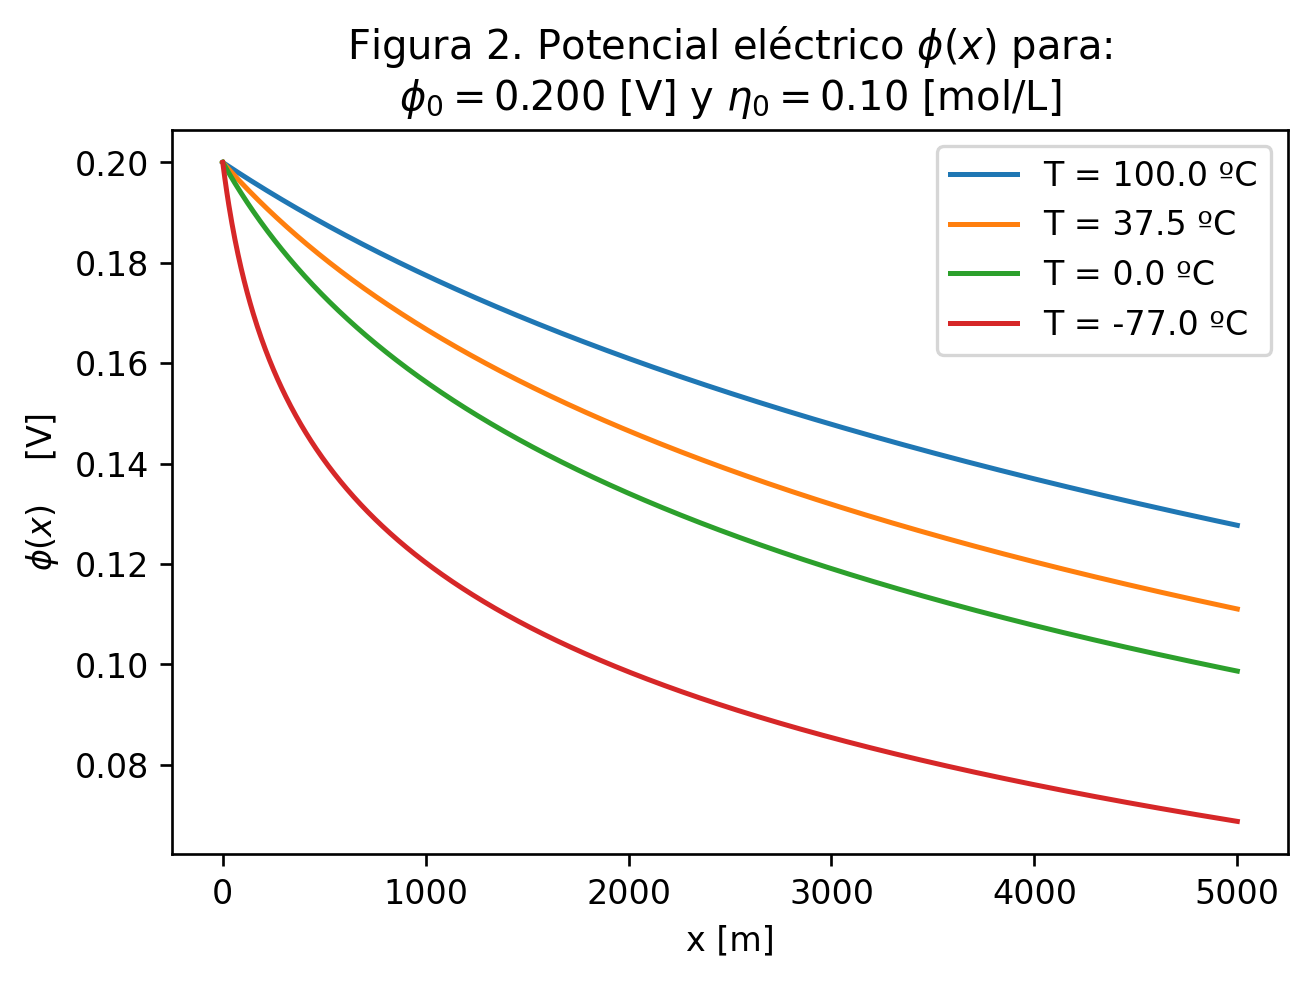

In [9]:
plt.figure(dpi=240)
x = np.linspace(1e-9, 5000, 1000)
for T in [100, 37.5, 0, -77]:
    plot_electric_potential(x, n0, phi_0, T, dpi=dpi, fig=2)
_ = plt.legend()

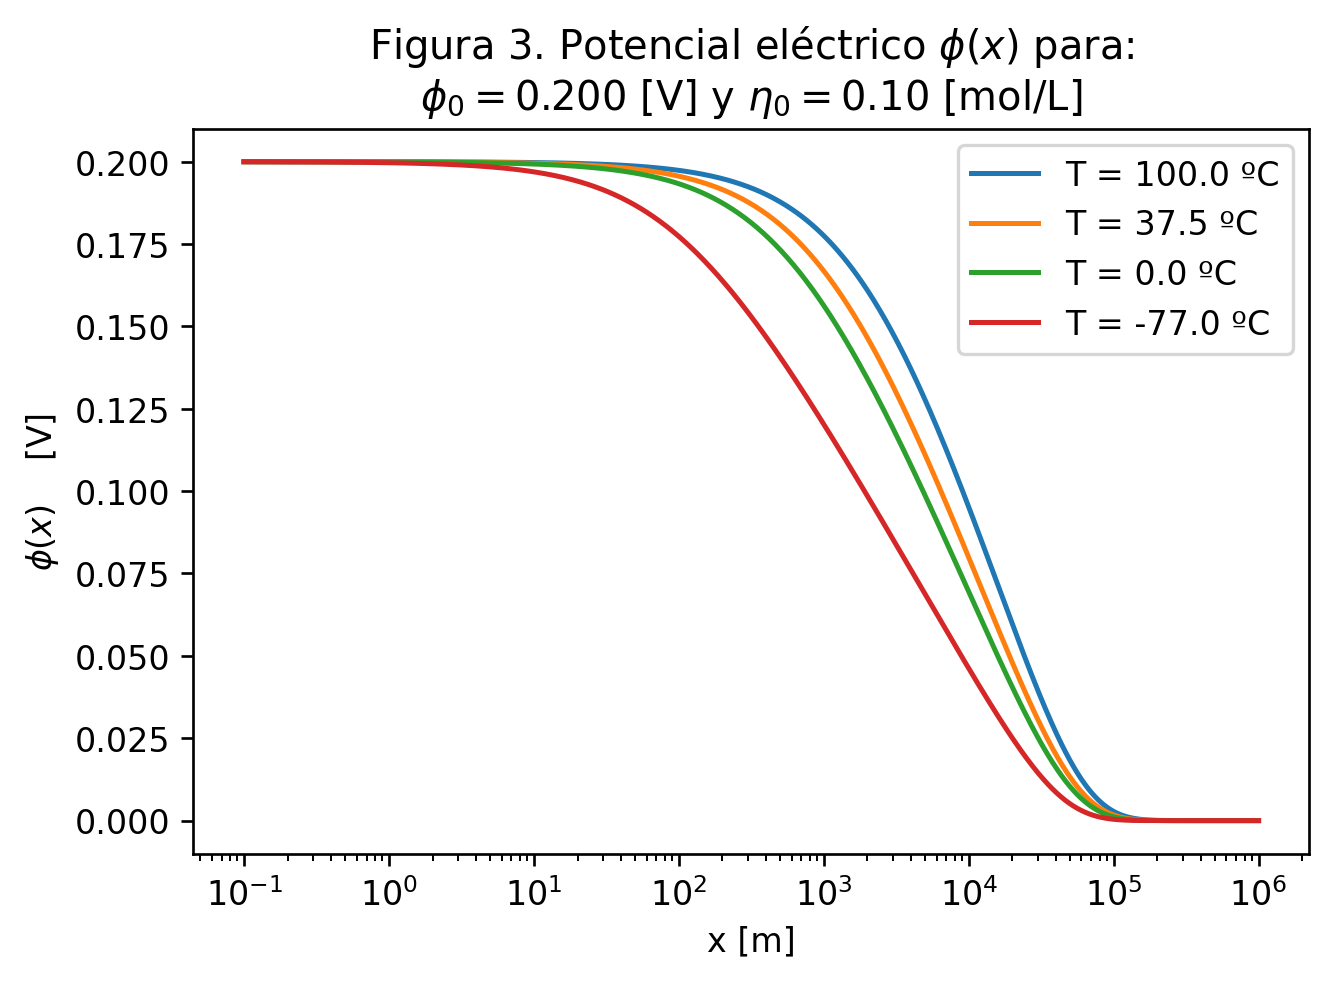

In [10]:
plt.figure(dpi=240)
x = np.logspace(-1, 6, 1000)
for T in [100, 37.5, 0, -77]:
    plot_electric_potential(x, n0, phi_0, T, dpi=dpi, fig=3)
plt.gca().set_xscale('log')
_ = plt.legend()

## 5. Preguntas de autoexplicación

5.1. Interprete la gráfica obtenida a partir de la solución analítica para 1D.

5.2. Para una misma concentración y temperatura, ¿cuál es el efecto de variar el potencial en el electrodo?

5.3. Para un mismo potencial en electrodo y temperatura, ¿cuál es el efecto de variar la concentración?

5.4. Para un mismo potencial y concentración, ¿cuál es el efecto de variar la temperatura?

End!